# EDA - Análisis Exploratorio de los Datos para Sistema de Recomendación de películas

## Ingesta de datos

In [156]:
# Librerias necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import re

In [157]:
import warnings
warnings.filterwarnings('ignore')

In [158]:
# Cargar el dataset 

df_expand = pd.read_parquet('df_filtrado.parquet')

In [159]:
df_expand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32484 entries, 0 to 32483
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                32484 non-null  int64         
 1   genres                32480 non-null  object        
 2   id                    32484 non-null  int64         
 3   original_language     32484 non-null  object        
 4   overview              32358 non-null  object        
 5   popularity            32484 non-null  float64       
 6   production_companies  26301 non-null  object        
 7   production_countries  26301 non-null  object        
 8   release_date          32484 non-null  datetime64[ns]
 9   revenue               32484 non-null  float64       
 10  runtime               32456 non-null  float64       
 11  status                32433 non-null  object        
 12  tagline               17996 non-null  object        
 13  title           

In [160]:
df_expand.head(2)

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,tagline,title,vote_average,vote_count,collection_name,spoken_languages,release_year,return,actors,director
0,30000000,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,...,None,Toy Story,7.7,5415.0,Toy Story Collection,English,1995,12.451801,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter
1,65000000,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,...,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,None,English,1995,4.043035,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Joe Johnston


## Chequeo de Nulos, Valores Duplicados y Tipos de Datos

In [161]:
# Chequeo de valores nulos
df_expand.isnull().sum()

budget                      0
genres                      4
id                          0
original_language           0
overview                  126
popularity                  0
production_companies     6183
production_countries     6183
release_date                0
revenue                     0
runtime                    28
status                     51
tagline                 14488
title                       0
vote_average                0
vote_count                  0
collection_name         31771
spoken_languages         2883
release_year                0
return                      0
actors                      0
director                    0
dtype: int64

Debido a la información contenida, se podría suponer que columnas como "production_countries", "tagline", "spoken_languages" podrían ser eliminadas debido a la cantidad de valores faltantes lo cual perjudicaría el entrenamiento del modelo.

En el caso de la columna "collection_name" la misma podría ser importante en cuanto al sistema de recomendación, pero al presentar tanta cantidad de nulos se decide eliminar.

Por otro lado, columnas como "id", "original_language", "release_date", "release_year", "runtime", "status", "director" y "actors" podrían considerarse irrelevantes en cuanto al contenido de las películas teniendo en cuenta el sistema de recomendación.

In [162]:
# Se eliminan columnas innecesarias
df_expand = df_expand.drop('tagline', axis = 1)
df_expand = df_expand.drop('release_date', axis = 1)
df_expand = df_expand.drop('release_year', axis = 1)
df_expand = df_expand.drop('id', axis = 1)
df_expand = df_expand.drop('original_language', axis = 1)
df_expand = df_expand.drop('runtime', axis = 1)
df_expand = df_expand.drop('production_countries', axis = 1)
df_expand = df_expand.drop('spoken_languages', axis = 1)
df_expand = df_expand.drop('status', axis = 1)
df_expand = df_expand.drop('director', axis = 1)
df_expand = df_expand.drop('actors', axis = 1)
df_expand = df_expand.drop('collection_name', axis = 1)

In [163]:
df_expand.head(2)

,budget,genres,overview,popularity,production_companies,revenue,title,vote_average,vote_count,return
0,30000000,"[Animation, Comedy, Family]","Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],373554033.0,Toy Story,7.7,5415.0,12.451801
1,65000000,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",262797249.0,Jumanji,6.9,2413.0,4.043035


In [164]:
# Chequeo de valores duplicados

df_expand["title"].duplicated().sum()


1944

In [165]:
# Revisión de tipo de datos
df_expand.dtypes


budget                    int64
genres                   object
overview                 object
popularity              float64
production_companies     object
revenue                 float64
title                    object
vote_average            float64
vote_count              float64
return                  float64
dtype: object

## Análisis Estadísticos de Datos

In [166]:
# Descriptivos básicos

df_expand.describe()


,budget,popularity,revenue,vote_average,vote_count,return
count,3.248400e+04,32484.000000,3.248400e+04,32484.000000,32484.000000,3.248400e+04
mean,5.586396e+06,3.391492,1.510037e+07,5.536793,141.493751,7.926222e+02
std,2.023906e+07,6.862904,7.533830e+07,1.882118,573.001172,8.515234e+04
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,0.000000e+00,0.432885,0.000000e+00,5.000000,3.000000,0.000000e+00
50%,0.000000e+00,1.286792,0.000000e+00,5.900000,11.000000,0.000000e+00
75%,0.000000e+00,4.852004,0.000000e+00,6.700000,43.000000,0.000000e+00
max,3.800000e+08,547.488298,2.787965e+09,10.000000,14075.000000,1.239638e+07


In [167]:
# Medidas de Tendencia central de variables numéricas
df_expand.describe(include=[np.number])

,budget,popularity,revenue,vote_average,vote_count,return
count,3.248400e+04,32484.000000,3.248400e+04,32484.000000,32484.000000,3.248400e+04
mean,5.586396e+06,3.391492,1.510037e+07,5.536793,141.493751,7.926222e+02
std,2.023906e+07,6.862904,7.533830e+07,1.882118,573.001172,8.515234e+04
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,0.000000e+00,0.432885,0.000000e+00,5.000000,3.000000,0.000000e+00
50%,0.000000e+00,1.286792,0.000000e+00,5.900000,11.000000,0.000000e+00
75%,0.000000e+00,4.852004,0.000000e+00,6.700000,43.000000,0.000000e+00
max,3.800000e+08,547.488298,2.787965e+09,10.000000,14075.000000,1.239638e+07


<Figure size 1400x800 with 0 Axes>

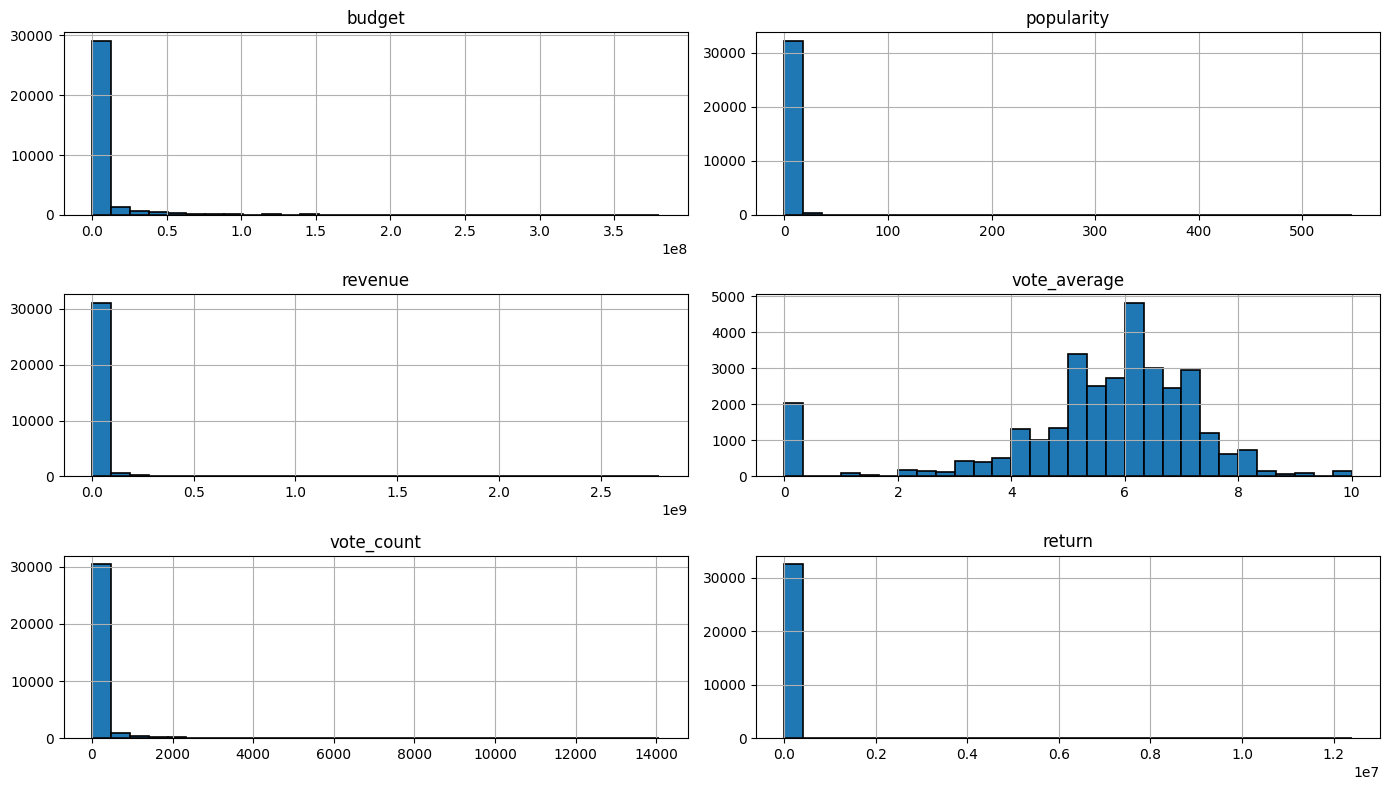

In [168]:
# Distribuciones de variables numéricas:

plt.figure(figsize=(14, 8))
df_expand.hist(bins=30, edgecolor='black', linewidth=1.2, figsize=(14, 8))
plt.tight_layout()
plt.show()


## Análisis de Correlaciones

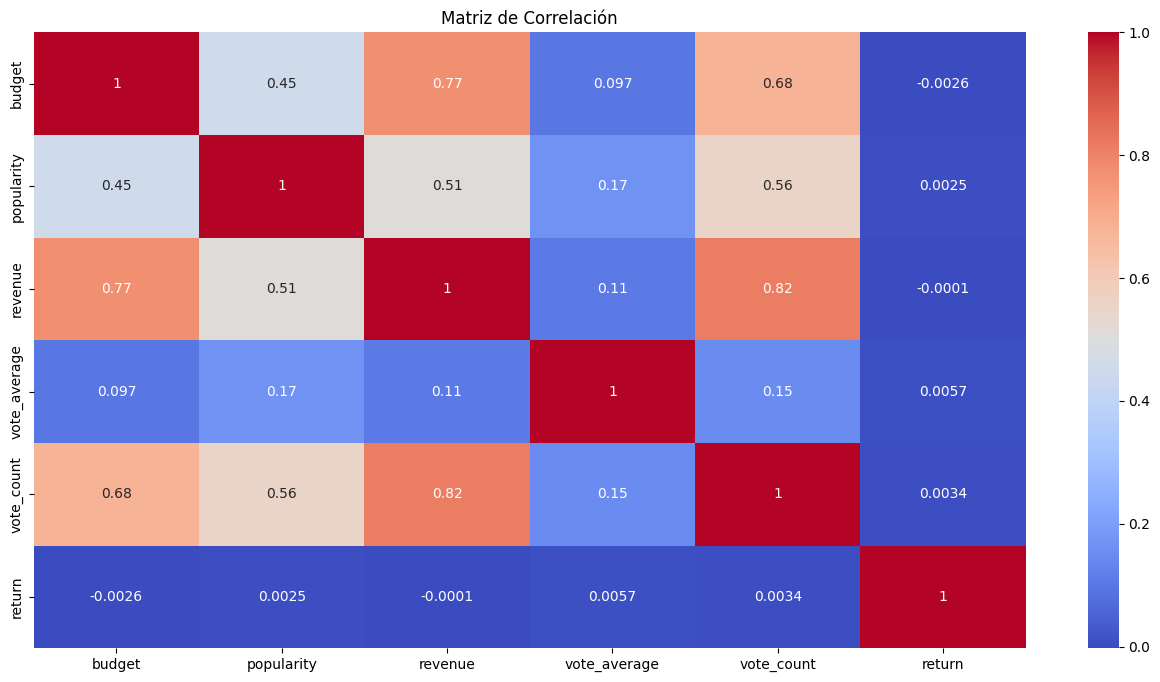

In [169]:
# Se realiza una matriz de correlación entre las variables numéricas.

data_num= df_expand.select_dtypes(exclude = ['object'])
data_num.head(2)

correlation_matrix = data_num.corr()

plt.figure(figsize=(16,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [170]:
# Parejas de variables más correlacionadas

corr_pairs = correlation_matrix.unstack().sort_values(kind="quicksort").drop_duplicates()
print(corr_pairs[(corr_pairs > 0.5) | (corr_pairs < -0.5)])


popularity  revenue       0.508769
            vote_count    0.557126
budget      vote_count    0.681553
revenue     budget        0.772972
vote_count  revenue       0.815112
budget      budget        1.000000
dtype: float64


A partir de las parejas de variables numéricas con mayor correlación positiva, podemos deducir que:
- Mayor popularidad a mayor ingresos.
- Mayor cantidad de votos a mayor popularidad.
- A mayor presupuesto mayor cantidad de votos.
- A mayor ingresos, mayor presupuesto.

Por otro lado, se puede deducir que tanto las variables "budget" como "revenue" no tienen ningun tipo de aporte al contenido de las peliculas lo cual es importante para el sistema de recomendación. En cambio, tanto "popularity" como "vote_count" podrían ser útiles en la recomendación.

Por esto, se deciden aplicar una reducción de la dimensionalidad, eliminando las variables numéricas y dejando solamente las columnas "popularity" y "vote_count".

In [171]:
# Se eliminan columnas innecesarias
df_expand = df_expand.drop('budget', axis = 1)
df_expand = df_expand.drop('revenue', axis = 1)
df_expand = df_expand.drop('return', axis = 1)



In [172]:
df_expand.head(2)

,genres,overview,popularity,production_companies,title,vote_average,vote_count
0,"[Animation, Comedy, Family]","Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],Toy Story,7.7,5415.0
1,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",Jumanji,6.9,2413.0


## Visualización de Datos Categóricos y Nube de Palabras

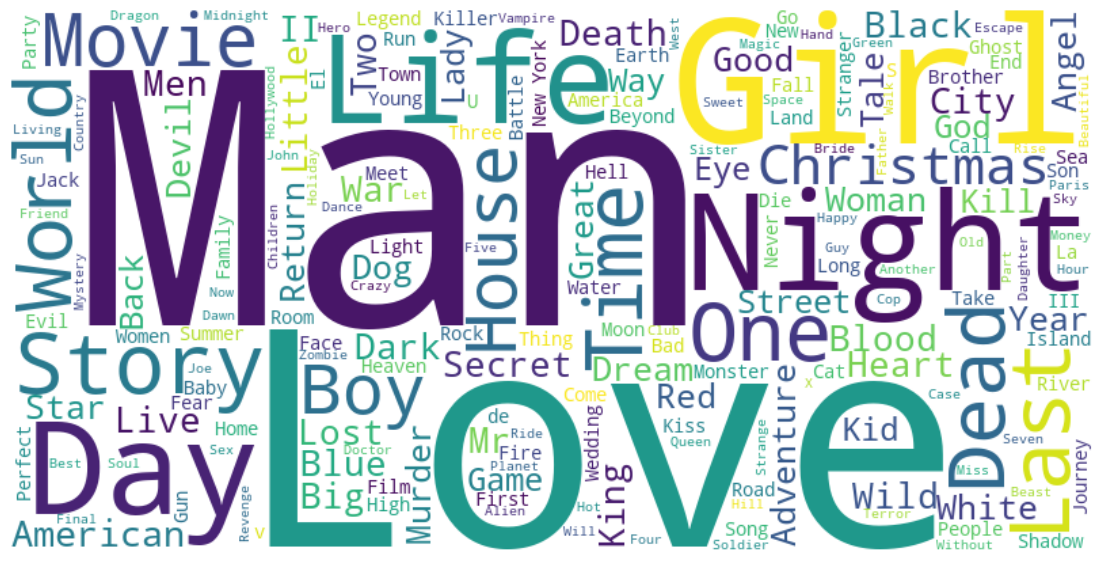

Palabras más frecuentes:
Man: 1.0
Love: 0.7996070726915521
Girl: 0.6542239685658153
Night: 0.6326129666011788
Day: 0.5736738703339882
Life: 0.5225933202357563
Story: 0.4675834970530452
Last: 0.44793713163064836
One: 0.4243614931237721
Time: 0.4223968565815324


In [173]:
# Nubes de palabras para titulos

from wordcloud import WordCloud

plt.figure(figsize=(14, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['title'].dropna()))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Obtener las palabras más frecuentes
frequent_words = wordcloud.words_

# Mostrar las 10 palabras más frecuentes
top_words = list(frequent_words.items())[:10]  # Obtener las 10 primeras palabras
print("Palabras más frecuentes:")
for word, freq in top_words:
    print(f"{word}: {freq}")


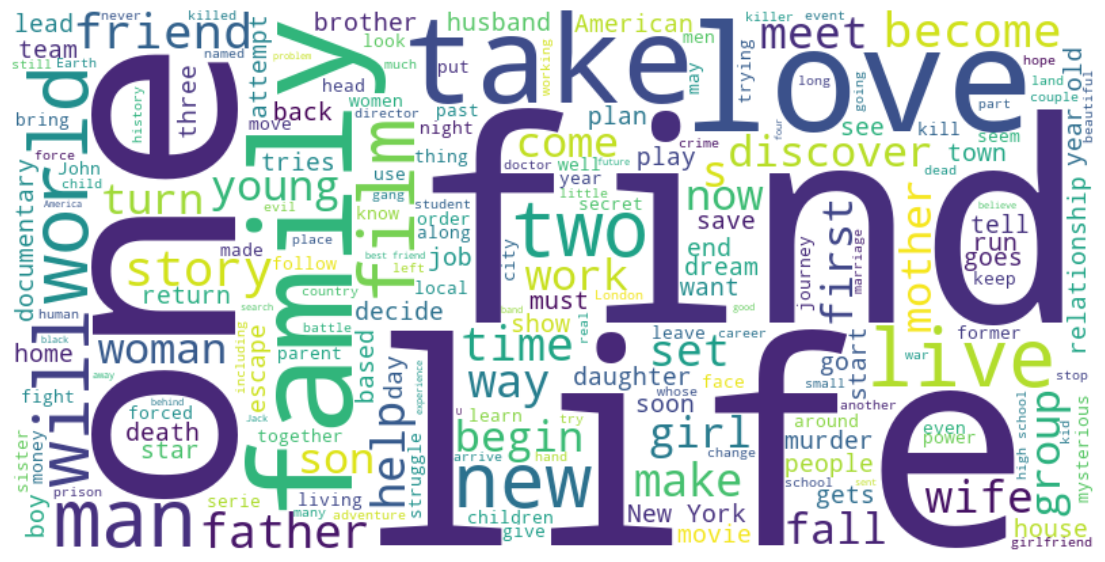

Palabras más frecuentes:
life: 1.0
find: 0.9831011646494634
one: 0.882849965745604
love: 0.6882849965745604
family: 0.6165791276547157
take: 0.6037908198218771
live: 0.5759305777574789
world: 0.5681662480018269
man: 0.5667960721625942
film: 0.537108928979219


In [174]:
# Nubes de palabras para overview

plt.figure(figsize=(14, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['overview'].dropna()))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Obtener las palabras más frecuentes
frequent_words = wordcloud.words_

# Mostrar las 10 palabras más frecuentes
top_words = list(frequent_words.items())[:10]  # Obtener las 10 primeras palabras
print("Palabras más frecuentes:")
for word, freq in top_words:
    print(f"{word}: {freq}")


## EXTRA

In [175]:
# Análisis de valores nulos y duplicados
print("Valores nulos por columna:")
print(df_expand.isnull().sum())



Valores nulos por columna:
genres                     4
overview                 126
popularity                 0
production_companies    6183
title                      0
vote_average               0
vote_count                 0
dtype: int64


Debido a la gran cantidad de datos, se deciden eliminar los registros que contienen valores nulos.

In [176]:
columnas_con_nulos = ['genres', 'overview', 'production_companies']

# Eliminar registros con valores nulos en las columnas especificadas
df_expand = df_expand.dropna(subset=columnas_con_nulos)

# Verificar los nuevos conteos de valores nulos
valores_nulos_nuevos = df_expand[columnas_con_nulos].isnull().sum()

print("Valores nulos por columna después de eliminarlos:")
print(valores_nulos_nuevos)


Valores nulos por columna después de eliminarlos:
genres                  0
overview                0
production_companies    0
dtype: int64


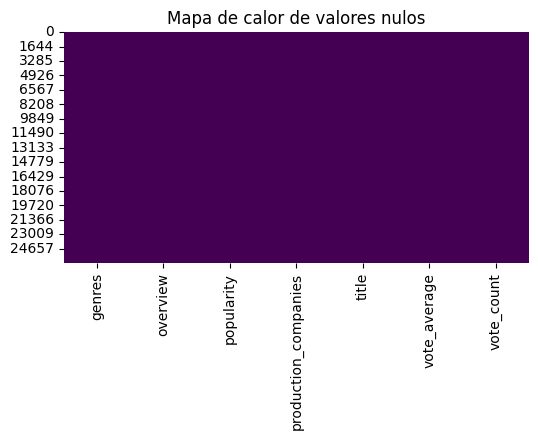

In [189]:
# Visualización de valores nulos con un heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(df_expand.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores nulos')
plt.show()

In [178]:
# Resumen estadístico de variables numéricas
print(df_expand.describe())

         popularity  vote_average    vote_count
count  26238.000000  26238.000000  26238.000000
mean       3.701344      5.629724    162.386958
std        6.818019      1.736179    618.296122
min        0.000000      0.000000      0.000000
25%        0.539025      5.000000      4.000000
50%        1.606043      6.000000     13.000000
75%        5.615488      6.700000     57.000000
max      547.488298     10.000000  14075.000000


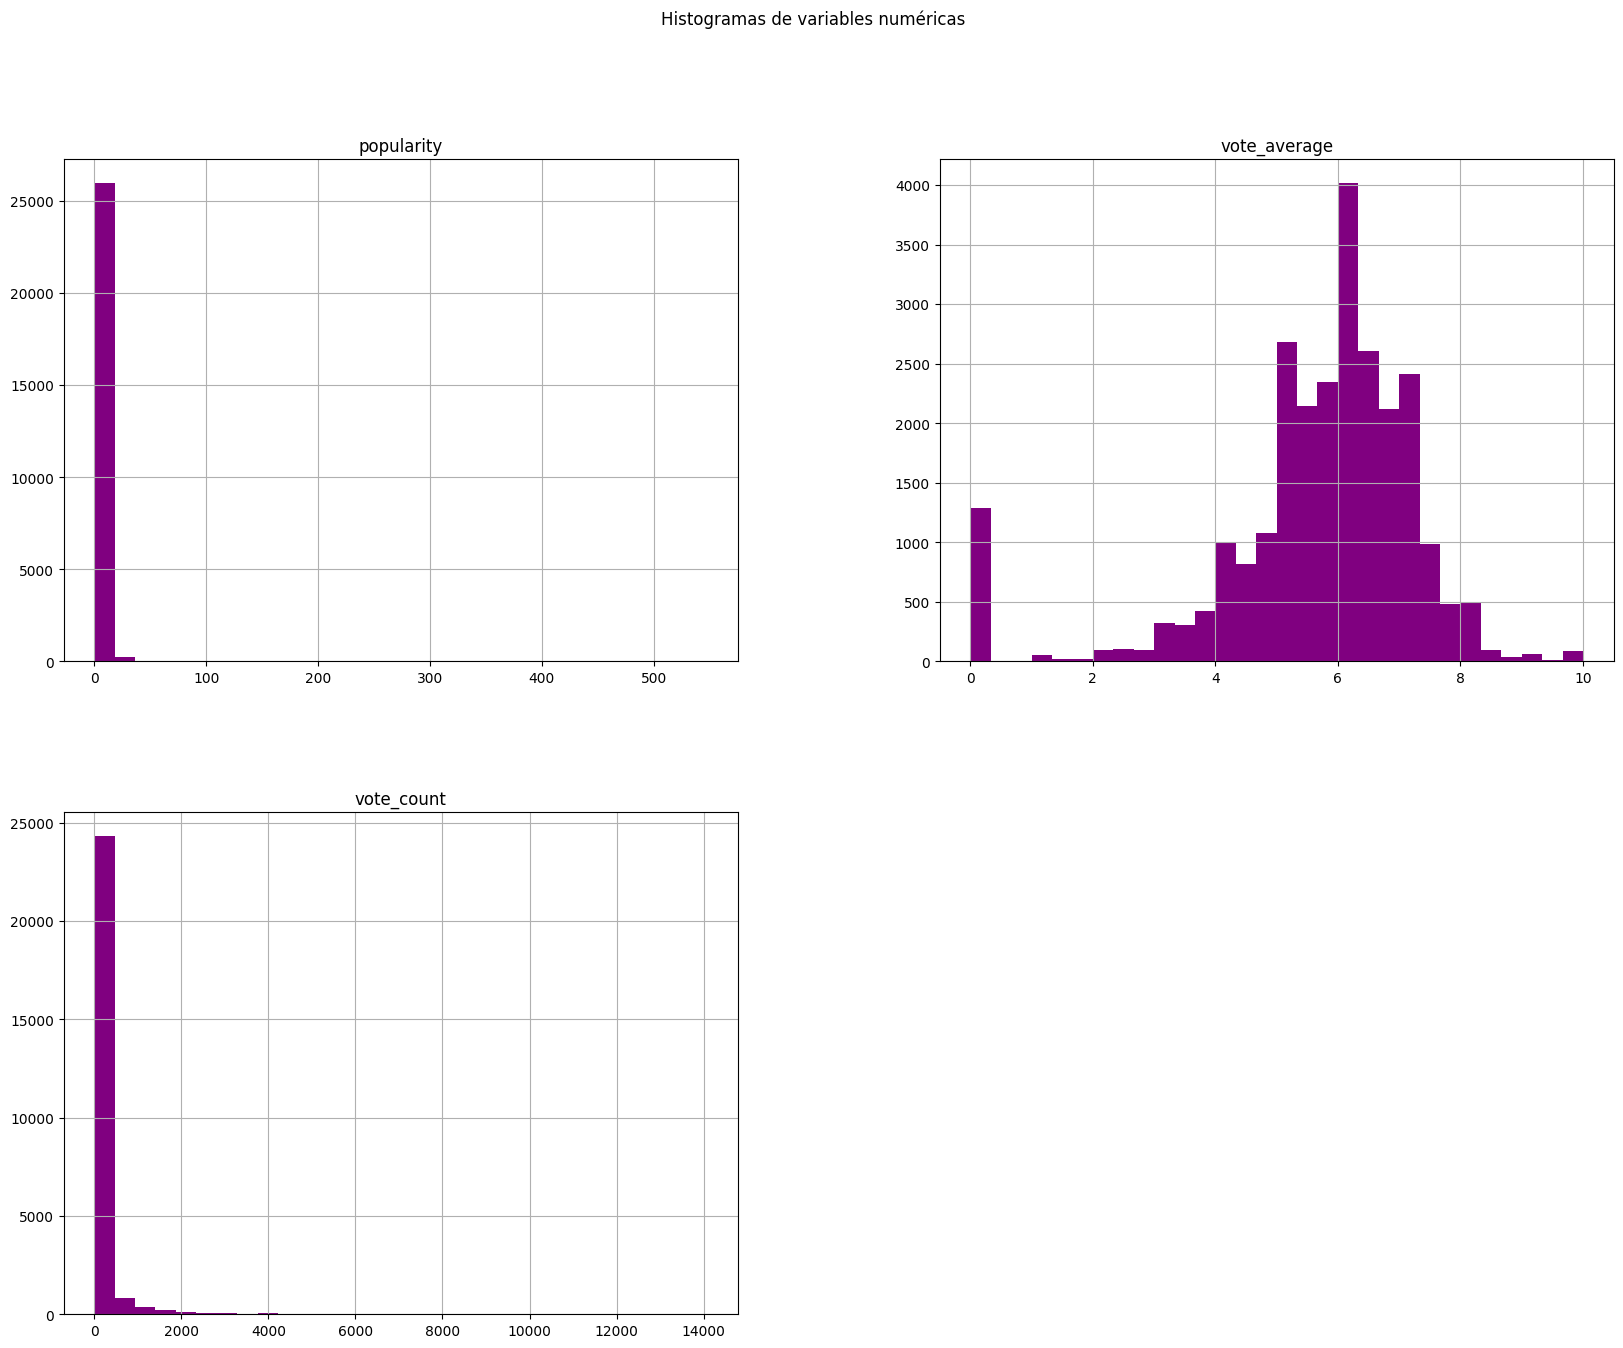

In [179]:
# Histogramas para variables numéricas
df_expand.hist(bins=30, figsize=(20, 15), color='purple')
plt.suptitle('Histogramas de variables numéricas')
plt.show()

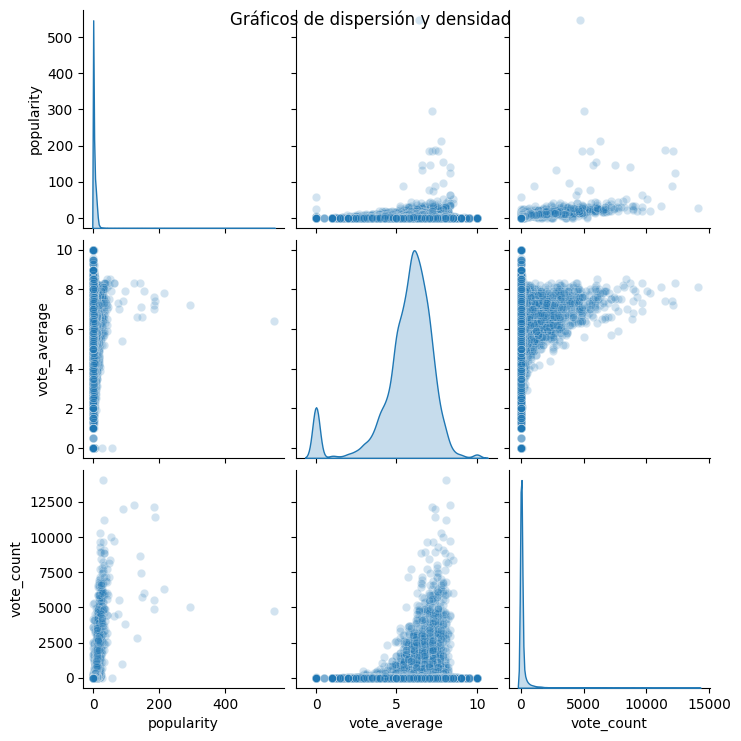

In [180]:
# Gráficos de dispersión para analizar correlaciones entre variables numéricas
numeric_columns = ['popularity', 'vote_average', 'vote_count']
sns.pairplot(df_expand[numeric_columns], diag_kind='kde', plot_kws={'alpha':0.2})
plt.suptitle('Gráficos de dispersión y densidad')
plt.show()

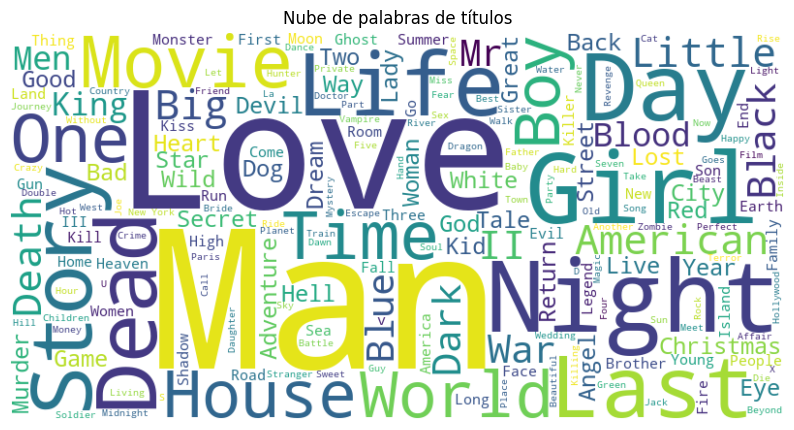

In [182]:
# Nubes de palabras para títulos
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_expand['title'].dropna()))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras de títulos')
plt.show()

In [185]:
df_expand.head(2)

,genres,overview,popularity,production_companies,title,vote_average,vote_count
0,"[Animation, Comedy, Family]","Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],Toy Story,7.7,5415.0
1,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",Jumanji,6.9,2413.0


In [188]:
df_expand.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26238 entries, 0 to 26302
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   genres                26238 non-null  object 
 1   overview              26238 non-null  object 
 2   popularity            26238 non-null  float64
 3   production_companies  26238 non-null  object 
 4   title                 26238 non-null  object 
 5   vote_average          26238 non-null  float64
 6   vote_count            26238 non-null  float64
dtypes: float64(3), object(4)
memory usage: 1.6+ MB


In [190]:
# Se eligen solo las columnas "genres", "overview" y "title" ya que son las mas relacionadas al contenido de las películas.
df_modelo = df_expand[['genres', 'overview', 'title']].copy()

In [191]:
df_modelo.head()

,genres,overview,title
0,"[Animation, Comedy, Family]","Led by Woody, Andy's toys live happily in his ...",Toy Story
1,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...,Jumanji
2,"[Romance, Comedy]",A family wedding reignites the ancient feud be...,Grumpier Old Men
3,"[Comedy, Drama, Romance]","Cheated on, mistreated and stepped on, the wom...",Waiting to Exhale
4,[Comedy],Just when George Banks has recovered from his ...,Father of the Bride Part II


In [192]:
# Convertir el contenido de "genres" de listas de python a string
df_modelo['genres'] = df_modelo['genres'].apply(lambda x: ', '.join(x))

In [195]:
df_modelo.head(2)

,genres,overview,title
0,"Animation, Comedy, Family","Led by Woody, Andy's toys live happily in his ...",Toy Story
1,"Adventure, Fantasy, Family",When siblings Judy and Peter discover an encha...,Jumanji


In [196]:
# Exportar a parquet dataset para modelo
df_modelo.to_parquet('streaming_model.parquet', index=False)

In [197]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26238 entries, 0 to 26302
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genres    26238 non-null  object
 1   overview  26238 non-null  object
 2   title     26238 non-null  object
dtypes: object(3)
memory usage: 819.9+ KB
